# Pandas
Este notebook tiene el objetivo de explicar las funciones básicas de la librería [Pandas](https://pandas.pydata.org)
![pythonpack](images/pandas.png)

Buscamos tres objetivos específicos en este notebook con Pandas:
1. Recordar la lectura de datos
2. Recordar como se plotean los gráficos
3. Efectuar operación con los DataFrame

In [1]:
# Si no la tenemos instalada podemos tipear la siguiente línea (descomentarla para usarla, quitar #)
#!pip install pandas

Pandas es una librería open-source que se basa en Numpy. Es un paquete de Python que ofrece varias estructuras de datos y operaciones para manipular datos numéricos y series de tiempo. Pandas es rápido y tiene alto rendimiento y productividad para los usuarios. 

En este caso a diferencia de lo analizado como tipos de datos previamente, aqui empleamos **DataFrame** es la estructura base de la librería. Son datos tabulares potencialmente heterogénea (mutables) de tamaño bidimensional con ejes etiquetados, es decir en un DataFrame los datos se alinean de forma tabular en filas y columnas. El concepto es muy similar a la forma de trabajo de Excel.

In [2]:
# Recuerden siempre importar las librerías que vamos usar. Normalmente son estas 3
import pandas as pd #PANDAS
from matplotlib import pyplot as plt #Para plotear
import numpy as np  #Para operaciones matemáticas
from scipy.interpolate import interp1d #interpola los datos. Nos sirve para extraer información

In [3]:
# Construímos una diccionario, recuerden lo que ya vimos anteriormente. La única diferencia es que tiene una lista en la definición del 'concepto'
data = {'Nombre':['Francisco', 'Anabela', 'Gabriel', 'Leonardo', 'Paulina','Tito'],
        'Edad':[20, 21, 19, 25, 22, 26]}
 
# convertimos es diccionario a DataFrame 
df = pd.DataFrame(data) #
 
df

Nombre  Edad
0  Francisco    20
1    Anabela    21
2    Gabriel    19
3   Leonardo    25
4    Paulina    22
5       Tito    26

Nota: habitualmente van a encontrar en la documentacion __'df'__, es la notación que se usa para referirse a dataframe. Recordar de evitar sobreescritura de la variable. Como en la celda siguiente=>

In [4]:
#Lectura de datos
df = pd.read_excel('data/Historicos-Estacion 3050_caudal.xlsx', 
                   skiprows=2, names =['datetime','caudal'])

#skiprows salta las líneas necesarias que no queremos leer

In [5]:
# Recordar que con Pandas podemos leer otro tipos de archivos. Alguno de los usados en ingeniería son. txt, csv. Para eso, usar la siguiente función
#pd.read_csv

In [6]:
# Funciones básicas para ver la estructura
#df.columns
df.head()

datetime   caudal
0  25/01/1904 22:43  17227.5
1  26/01/1904 22:43  17452.0
2  27/01/1904 22:43  17588.1
3  28/01/1904 22:43  17679.4
4  29/01/1904 22:43  17771.2

__NOTA__: solo en el caso que usen fechas, deben realizar la siguiente corrección, dado que las fechas que usamos en la región estan estructuradas por día/mes/año y Python usa mes/día/año. Inclusive si tenemos mas información, por ejemplo hora y minutos es necesario declararlos. Esto nos permite efectuar operaciones con fechas. 

In [7]:
#Corrección de dato de datetime
df['datetime'] = pd.to_datetime(df.datetime, format="%d/%m/%Y %H:%M")##formateo el tiempo indicandole como es el formato de dato de entrada. Nuestro caso 28/12/2021 00:00

df['datetime'] = df['datetime'].astype('datetime64[ns]')# renombro la columna datetime. La sobre escribo

In [8]:
# Podemos usar el método iloc para seleccionar ciertas columnas y filas o usar el nombre de la columna una única columna
df.iloc[:,1]
#La otra forma
#df['caudal']

0        17227.50
1        17452.00
2        17588.10
3        17679.40
4        17771.20
           ...   
43078    10986.27
43079    11082.03
43080    11176.75
43081    11219.56
43082    11122.60
Name: caudal, Length: 43083, dtype: float64

#### Ploteamos los resultados

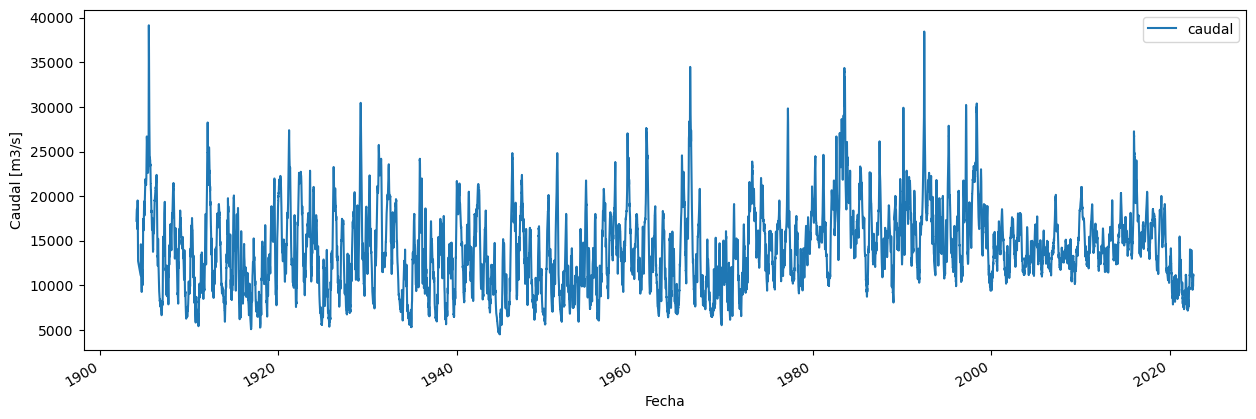

In [9]:
# Ploteamos rapidamente para ver los datos
df.plot(x='datetime', y='caudal', figsize=(15,5)) #el ultimo argumento es el tamaño de la figura
plt.xlabel("Fecha")
plt.ylabel("Caudal [m3/s]")
plt.show()

## Como hacemos operaciones con Pandas

Bueno primero tengan en cuenta como es la estructura de datos (filas y columnas), muy similar a lo que propone Excel. Ahora bien, podemos emplear esa estructura de datos para realizar operaciones (y muchas). Vamos de fácil a difícil con el dataframe ya leído arriba.

In [10]:
# Suma, resta, producto o división de toda una columna (y crear otra columna)
df ['caudalpor5'] = df.iloc[:,1]*5
df.head()
df.shape

(43083, 3)

__NOTA__: los ':' (dos puntos) simbolizan que estamos escogiendo todas las filas, y luego de la coma, la columna que deseamos trabajar, es decir, en el ejemplo previo tomamos todas las filas de la columna 1 (en nuestro caso caudal) y la multiplicamos por 5. 

Tambien podemos borrar una columna que hemos construído

In [11]:
df = df.drop(columns=["caudalpor5"])

Ahora hagamos operaciones con condicionantes en un bucle for. El ejemplo siguiente crea una columna al dataframe, llamamos a la columna 'CONDICION' y le otorga valores de 0 a 2 dependiendo el caudal, es decir 0 (<5000), 1 (5000-15000) y 2 (>15000). Veamos como lo planteamos en un código.

In [12]:
#creo la columna
df["Condicion"] = ""

#este bucle enumera los valores adentro del dataframe y permite otorgarle un valor en base a una condición
for (index, value) in  df.iterrows():
    if value[1]<=5000:# menor o igual a 3
        df.iloc[index, -1] = 0
    elif 5000<value[1]<=15000: # entre 3 y menor o igual a 4.5
        df.iloc[index, -1] = 1
    elif 15000<value[1]: #mayor a 4.5 
        df.iloc[index, -1] = 2
        
df
# la variable index es el índice de cada fila
# el -1 indica que se rellenará la ultima columna del dataframe

datetime    caudal Condicion
0     1904-01-25 22:43:00  17227.50         2
1     1904-01-26 22:43:00  17452.00         2
2     1904-01-27 22:43:00  17588.10         2
3     1904-01-28 22:43:00  17679.40         2
4     1904-01-29 22:43:00  17771.20         2
...                   ...       ...       ...
43078 2022-08-29 00:00:00  10986.27         1
43079 2022-08-30 00:00:00  11082.03         1
43080 2022-08-31 00:00:00  11176.75         1
43081 2022-09-01 00:00:00  11219.56         1
43082 2022-09-02 00:00:00  11122.60         1

[43083 rows x 3 columns]

## Frecuencia
__FRECUENCIA RELATIVA__ Obtenemos la frecuencia relativa de una columna de interés, por ejemplo caudal, en base a un método interno de Pandas llamado [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html). La función retorna la cantidad de veces que se reítera una variable. Como en nuestro caso debemos analizar rangos, dado que los caudales no son idénticos. Obtenemos la frecuencia relativa y absoluta

In [13]:
#Frecuencia relativa
frecuencia_relativa = df['caudal'].value_counts(sort=False, bins=100, normalize=True)*100

print(frecuencia_relativa)

intervalos = frecuencia_relativa.keys()

#print(intervalos)

(4458.342, 4839.571]      0.132303
(4839.571, 5186.142]      0.099807
(5186.142, 5532.713]      0.188009
(5532.713, 5879.284]      0.450294
(5879.284, 6225.855]      0.619734
                            ...   
(37417.245, 37763.816]    0.004642
(37763.816, 38110.387]    0.006963
(38110.387, 38456.958]    0.013927
(38456.958, 38803.529]    0.002321
(38803.529, 39150.1]      0.006963
Name: caudal, Length: 100, dtype: float64


La funció `value_count` tiene varios argumentos de entrada, pero nosotros solo usaremos`sort`, `bins` y `normalize`. El primero ordena la frecuencia (por defecto mayor a menor). El segundo le indicamos en cuantos rangos queremos subdividir la lista de datos (en este caso 100 rangos de caudales, cuantos mas rangos le ponemos mejor son las gráficas de curva de duración, estamos tomando mayor representatividad). El tercero efectúa la normalización, es decir divide por el número total de datos. Este resultado no es porcentual, es por eso que se multiplica por 100.

__FRECUENCIA ABSOLUTA__. A continuación obtenemos la frecuencia absoluta

In [14]:
frecuencia_absoluta = 100 - np.sort(np.cumsum(frecuencia_relativa))

#print(frecuencia_absoluta)

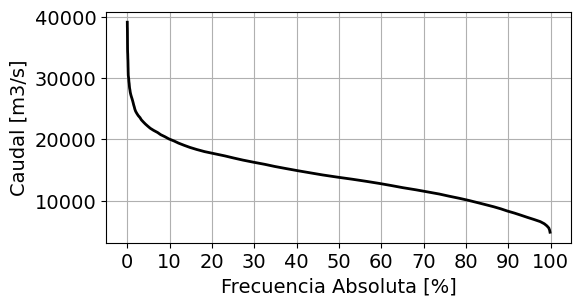

In [15]:
#Creamos figure
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(frecuencia_absoluta, intervalos[:].right,'-k', linewidth=2)

#Editamos la gráfica
ax.tick_params(axis='y', labelsize=14)#Cambia el tamaño de la letra eje X
ax.tick_params(axis='x', labelsize=14)#Cambia el tamaño de la letra eje Y
ax.set_ylabel('Caudal [m3/s]', fontsize=14)# agregar la etiqueta de Y
ax.set_xlabel('Frecuencia Absoluta [%]', fontsize=14)#agregamos la etiqueta de X
ax.xaxis.set_ticks(np.arange(0, 110, 10))#agregamos los limites de x y separación 
ax.grid()

# Si queremos guardar la figura 
#plt.savefig('curva_duracion.jpg', dpi =300)

En el paso siguiente vamos a crear una columna que contega los caudales referidos al delta de porcentaje de duración [0,10,20...]

In [16]:
Qtemp = {}
n = 0 # es una variable bandera que cuenta los pasos
for i in range(0,110,10):
    if i< 100:
        f = interp1d(frecuencia_absoluta, intervalos[:].right)#Hago la interpolación
        Qtemp[n] = f(i)
        n+=1#le sumo uno en cada paso a la variable bandera
    else:#lo que sigue es porque la función de interpolación no alcanza al 100% y tenemos que agregarlo manualmente al valor mínimo
        Qtemp[n] = np.min(df['caudal'])

#print(Qtemp.values())

In [17]:
#contruimos un vector columna
tempor = np.arange(0,101,10) #va hasta 101 porque arange no incluye el ultimo número

#construimos el diccionario
data = {'Tiempo':tempor,
        'Caudal':Qtemp.values()}

# convertimos es diccionario a DataFrame 
df = pd.DataFrame(data) #

#Vemos que tiene
df

Tiempo              Caudal
0        0   39150.09999999717
1       10  20036.774008768665
2       20   17754.32334582925
3       30   16254.67014755672
4       40  14925.340914045417
5       50  13803.767514202711
6       60  12755.117062102689
7       70  11543.099576357563
8       80  10138.772097907951
9       90   8260.114671563344
10     100              4493.0

Continuamos con el ejemplo sobre el río Paraná. En la siguiente figura presentamos una relación cota_de_restitución vs Caudal. Recordemos que para el ejemplo lo damos como dato en el caso de la represa La Barrancosa y Cóndor Cliff.

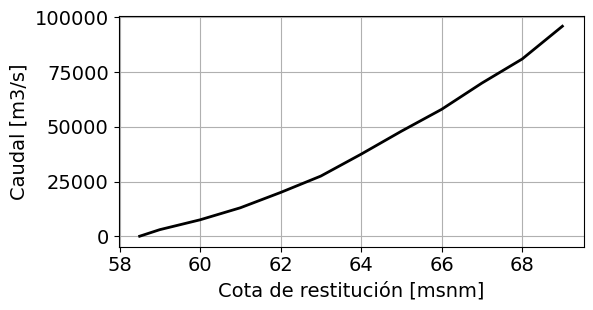

In [18]:
#Dato de entrada que se le otorga en el práctico y se construye en la etapa de diseño. ejemplo río Paraná
x = [ 58.5, 59, 60,61,62,63,64,65,66,67,68,69]
y = [0,3000,7500,13000,20000,27500,37500,48000,58000,70000,81000,96000] 

#Creamos figure
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, y,'-k', linewidth=2)
#Editamos la gráfica
ax.tick_params(axis='y', labelsize=14)#Cambia el tamaño de la letra eje X
ax.tick_params(axis='x', labelsize=14)#Cambia el tamaño de la letra eje Y
ax.set_ylabel('Caudal [m3/s]', fontsize=14)# agregar la etiqueta de Y
ax.set_xlabel('Cota de restitución [msnm]', fontsize=14)#agregamos la etiqueta de X
ax.grid()

Podemos hacer lo mismo que para curva duración en este caso hacer una interpolación de la curva y extraer los datos o extraerlos mirando

In [19]:
#Construimos la columna y la llenamos de valores calculados de la interpolación de la curva previa
df['COTA_RES'] = ""
n = 0 # es una variable bandera que cuenta los pasos
f = interp1d(y, x)#Hago la interpolación

for ( index, value) in  df.iterrows():
    #print(value)
    df.iloc[n,2] = f(value[1])
    n+=1#le sumo uno en cada paso
    
df

Tiempo              Caudal            COTA_RES
0        0   39150.09999999717   64.15715238095211
1       10  20036.774008768665   62.00490320116916
2       20   17754.32334582925   61.67918904940418
3       30   16254.67014755672   61.46495287822239
4       40  14925.340914045417   61.27504870200649
5       50  13803.767514202711   61.11482393060039
6       60  12755.117062102689  60.955475829473215
7       70  11543.099576357563  60.735109013883196
8       80  10138.772097907951  60.479776745074176
9       90   8260.114671563344  60.138202667556975
10     100              4493.0   59.33177777777778

Para mayor información pueden ir a los siguiente links:
- Revisar la función interpolar 1D. [LINK](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)
- Pueden redondear los numero usando la función `round`. [LINK](https://www.w3schools.com/python/ref_func_round.asp)